Link : [Kaggle Page](https://www.kaggle.com/datasets/mariyamalshatta/nike-vs-addidas-unspervised-clustering/data)

## Data Description 
The dataset consists of 3268 products from Nike and Adidas with features of information including their ratings, discount, sales price, listed price, product name, and the number of reviews.

## Primary Objective
Machine learning clustering techniques approach for extracting actionable insights from the Nike and Adidas footwear dataset, enabling data-driven decision making and strategic business recommendations.

## Detailed Objectives

1. **Data Analysis & Pattern Discovery**
   - Uncover hidden patterns and relationships within the footwear product data
   - Identify key variables that significantly influence product performance
   - Analyze the correlation between pricing strategies and customer ratings

2. **Advanced Clustering Implementation**
   - Develop and implement sophisticated clustering algorithms to segment products based on multiple attributes
   - Identify distinct product groups with similar characteristics and market behavior
   - Validate cluster quality using robust statistical methods

3. **Business Intelligence Generation**
   - Transform clustering results into actionable business insights
   - Compare product strategies between Nike and Adidas within each cluster
   - Identify market gaps and opportunities for product optimization

4. **Strategic Recommendations**
   - Develop data-backed recommendations for pricing strategies
   - Identify successful product characteristics within each cluster
   - Propose targeted improvements for underperforming product segments

## Expected Outcomes
The project aims to deliver a comprehensive understanding of product positioning, market segmentation, and competitive dynamics between Nike and Adidas, enabling informed decision-making for product development and marketing strategies.

# Import Library and Load Dataset that i got from Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples
from wordcloud import WordCloud

In [6]:
pd.set_option("display.max_rows", 100)
df = pd.read_csv('data_nike_vs_addidas_unsupervised.csv')

In [7]:
df.head(100)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,Adidas CORE / NEO,1.0,45
6,Women's adidas Sport Inspired Duramo Lite 2.0 ...,CG4051,4799,2399,50,Adidas CORE / NEO,4.4,2
7,Women's adidas Swim Puka Slippers,CM0080,999,599,40,Adidas CORE / NEO,2.8,7
8,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,B75990,5599,2799,50,Adidas CORE / NEO,4.5,16
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,Adidas ORIGINALS,4.0,39


## Data Pre-processing

### Raw data understanding

In [5]:
df = df.drop_duplicates()  # Removes duplicate rows from the DataFrame
print(f"There are {item0-item1} duplicates found in the dataset")  # Prints the number of duplicates that were removed

There are 88 duplicates found in the dataset


In [11]:
def extract_gender(x):
    if x.lower().startswith("men's"):
        return "Men's"
    elif x.lower().startswith("women's"):
        return "Women's"
    else:
        return "Unisex"
df['Gender'] = df['Product Name'].apply(extract_gender)

df['Type'] = df['Product Name'].apply(lambda x: x.lower().split()[-1])

In [12]:
df

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,Gender,Type
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41,Women's,shoes
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24,Women's,shoes
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37,Women's,slippers
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35,Women's,shoes
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72,Women's,shoes
...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1,Unisex,retro
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0,Unisex,ic
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1,Unisex,tf
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4,Unisex,98


In [13]:
unique_counts_per_column = df.nunique(axis=0)

In [14]:
unique_counts_per_column

Product Name     1531
Product ID       3179
Listing Price      78
Sale Price        227
Discount            6
Brand               5
Rating             32
Reviews           102
Gender              3
Type              200
dtype: int64

In [98]:
zero_df = df[df['Reviews'] == 0]

In [99]:
zero_df.head(100)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
179,Men's adidas Running Puaro Shoes,CL7507,4999,2499,50,Adidas CORE / NEO,4.8,0
307,MEN'S ADIDAS RUNNING PUARO SHOES,CK9678,4999,2499,50,Adidas CORE / NEO,1.5,0
478,Men's adidas Outdoor Geocach 19 Shoes,CM0014,4999,2499,50,Adidas SPORT PERFORMANCE,4.5,0
530,Women's adidas Originals Supercourt Shoes,EG9053,7999,7999,0,Adidas ORIGINALS,3.8,0
565,Men's adidas Sport Inspired Run 60s Shoes,EE9728,5599,3359,40,Adidas CORE / NEO,3.7,0
637,Women's adidas Outdoor Elevate 2018 Sandals,CL9968,2799,1679,40,Adidas SPORT PERFORMANCE,4.9,0
652,Women's adidas Running Cyberg 1.0 Shoes,CM4692,3799,3799,0,Adidas CORE / NEO,4.0,0
933,Men's adidas Originals X_PLR Shoes,EE4572,7599,4559,40,Adidas ORIGINALS,4.1,0
954,Men's adidas Running Cosmic 2 Shoes,B44882,6999,3499,50,Adidas CORE / NEO,2.7,0
994,Women's adidas Originals Pharrell Williams Ten...,D96553,8999,4499,50,Adidas ORIGINALS,3.5,0


In [100]:
zeroprice_df = df[df['Sale Price'] == 0]

In [101]:
zeroprice_df

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews


In [102]:
df = df[df['Reviews'] != 0]

In [103]:
df

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
...,...,...,...,...,...,...,...,...
3261,Kyrie 6 'Enlightenment',BQ4630-500,10995,8797,0,Nike,4.4,10
3262,Nike React Metcon AMP,CT9155-063,0,13995,0,Nike,3.0,1
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1


In [104]:
df.dtypes

Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Rating           float64
Reviews            int64
dtype: object

In [105]:
unique_counts_per_column = df.nunique(axis=0)
unique_counts_per_column 

Product Name     1403
Product ID       2962
Listing Price      76
Sale Price        214
Discount            6
Brand               5
Rating             32
Reviews           101
dtype: int64

In [106]:
df.isnull().values.any()

False

In [107]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Listing Price,3011.0,7165.0,4550.0,0.0,4599.0,6599.0,8999.0,29999.0
Sale Price,3011.0,5866.0,4120.0,449.0,2999.0,4559.0,7599.0,29999.0
Discount,3011.0,29.0,22.0,0.0,0.0,40.0,50.0,60.0
Rating,3011.0,3.0,1.0,0.0,3.0,4.0,4.0,5.0
Reviews,3011.0,44.0,30.0,1.0,16.0,43.0,70.0,223.0


In [118]:
def extract_gender(x):
    if x.lower().startswith("men's"):
        return "Men's"
    elif x.lower().startswith("women's"):
        return "Women's"
    else:
        return "Unisex"
df['Gender'] = df['Product Name'].apply(extract_gender)

df['Type'] = df['Product Name'].apply(lambda x: x.lower().split()[-1])

In [119]:
df

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,Gender,Type
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41,Women's,shoes
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24,Women's,shoes
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37,Women's,slippers
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35,Women's,shoes
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72,Women's,shoes
...,...,...,...,...,...,...,...,...,...,...
3247,Nike Air Force 1 '07 SE,CI3446-001,0,7995,0,Nike,5.0,1,Unisex,se
3249,Nike React Metcon,BQ6044-100,0,12995,0,Nike,3.9,10,Unisex,metcon
3256,Nike Metcon 5 AMP,CN5455-160,0,11995,0,Nike,4.5,2,Unisex,amp
3261,Kyrie 6 'Enlightenment',BQ4630-500,10995,8797,0,Nike,4.4,10,Unisex,'enlightenment'


In [108]:
for numeric_column in df.select_dtypes(include=["int64", "float64"]).columns:
    fig = px.box(df, x=numeric_column, y="Brand", hover_data=["Product Name"])
    fig.update_traces(quartilemethod="linear")
    fig.show()

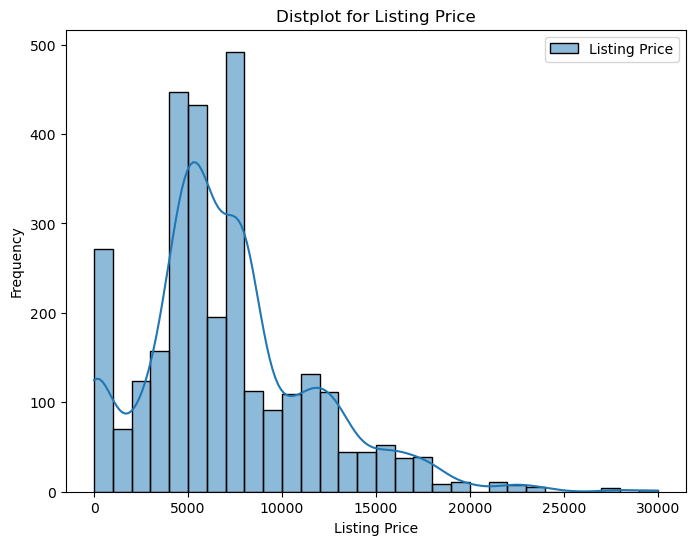

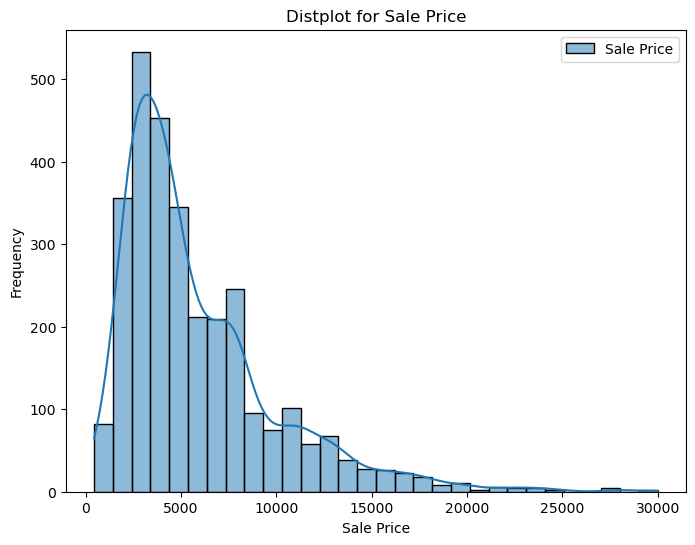

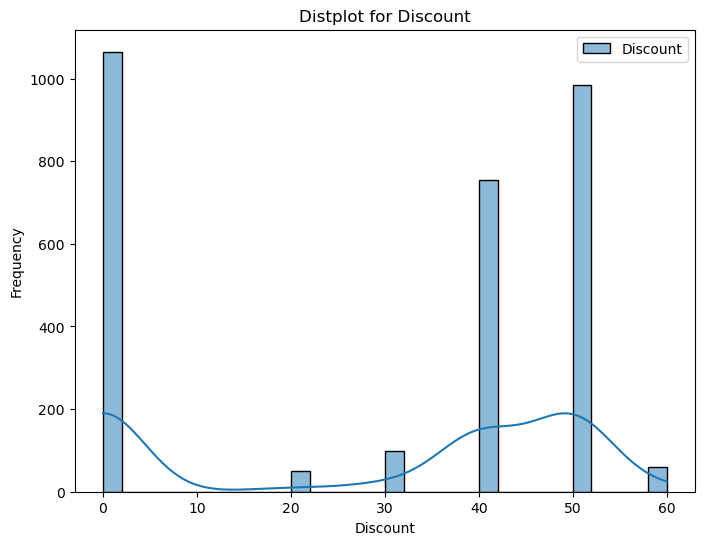

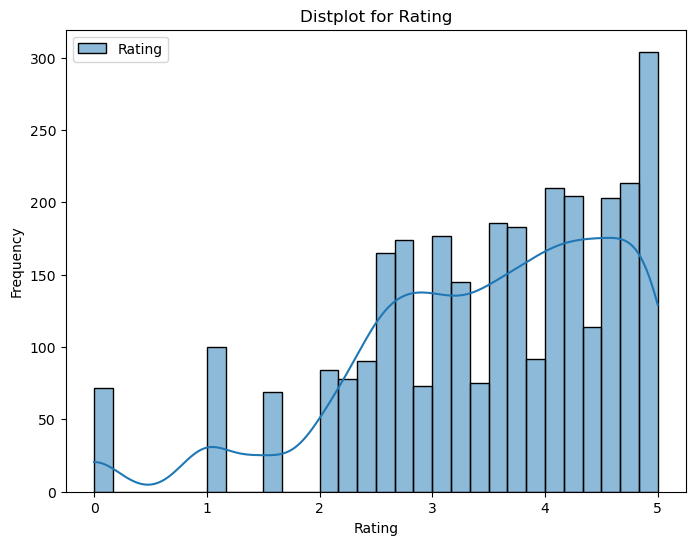

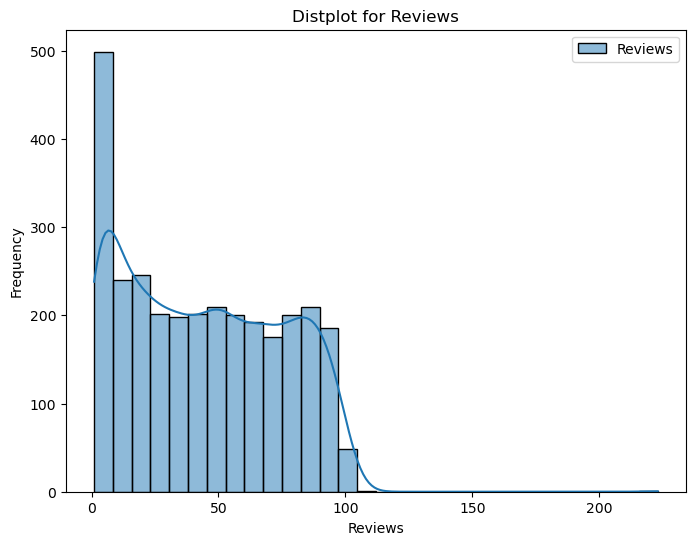

In [109]:
for numeric_column in df.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[numeric_column], kde=True, bins=30, label=numeric_column)
    plt.title(f"Distplot for {numeric_column}")
    plt.xlabel(numeric_column)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

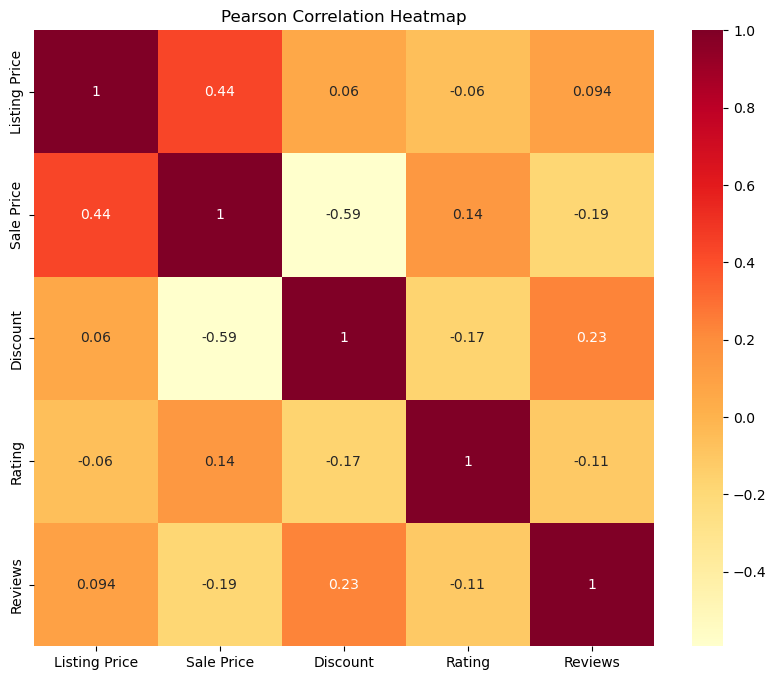

In [110]:
numeric_column = df.select_dtypes(include=["int64", "float64"])

corr_matrix = numeric_column.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Pearson Correlation Heatmap')
plt.show()

## Outlier handling

In [111]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df

for col in ['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']:
    df = remove_outliers_iqr(df, col)

In [112]:
df

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
...,...,...,...,...,...,...,...,...
3247,Nike Air Force 1 '07 SE,CI3446-001,0,7995,0,Nike,5.0,1
3249,Nike React Metcon,BQ6044-100,0,12995,0,Nike,3.9,10
3256,Nike Metcon 5 AMP,CN5455-160,0,11995,0,Nike,4.5,2
3261,Kyrie 6 'Enlightenment',BQ4630-500,10995,8797,0,Nike,4.4,10


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2659 entries, 0 to 3265
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   2659 non-null   object 
 1   Product ID     2659 non-null   object 
 2   Listing Price  2659 non-null   int64  
 3   Sale Price     2659 non-null   int64  
 4   Discount       2659 non-null   int64  
 5   Brand          2659 non-null   object 
 6   Rating         2659 non-null   float64
 7   Reviews        2659 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 187.0+ KB


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2659 entries, 0 to 3265
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   2659 non-null   object 
 1   Product ID     2659 non-null   object 
 2   Listing Price  2659 non-null   int64  
 3   Sale Price     2659 non-null   int64  
 4   Discount       2659 non-null   int64  
 5   Brand          2659 non-null   object 
 6   Rating         2659 non-null   float64
 7   Reviews        2659 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 187.0+ KB


Best K: 2


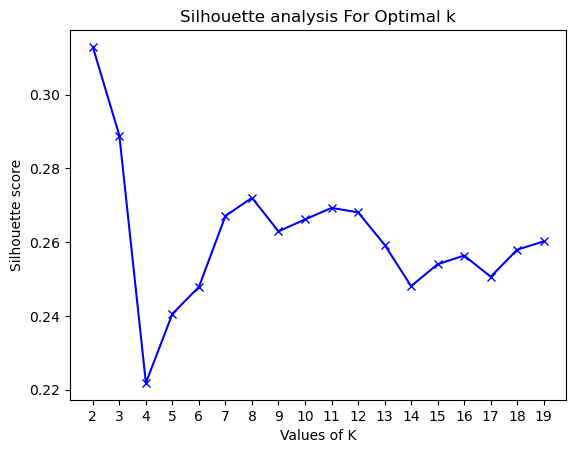

In [115]:
# Prepare the data by dropping non-numeric or unnecessary columns
X = df.drop(['Product ID', 'Product Name', 'Brand'], axis=1)

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Convert to pandas DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=X.columns)

silhouette_avg = []
for num_clusters in list(range(2,20)):
    kmeans = KMeans(n_clusters=num_clusters, init = "k-means++", n_init = 10)
    kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_avg.append(score)

import matplotlib.pyplot as plt
plt.plot(np.arange(2,20),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
_ = plt.xticks(np.arange(2,20))

print (f"Best K: {np.argmax(silhouette_avg)+2}")

In [116]:
# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import silhouette_score, silhouette_samples


# # Prepare the data by dropping non-numeric or unnecessary columns
# X = df.drop(['Product ID', 'Product Name', 'Brand'], axis=1)

# # Scale the data
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(X)

# # Convert to pandas DataFrame
# scaled_df = pd.DataFrame(scaled_features, columns=X.columns)

# # Elbow method to find the optimal number of clusters
# wcss = {}
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#     kmeans.fit(scaled_features)
#     wcss[i] = kmeans.inertia_

# plt.figure(figsize=(10, 6))
# plt.plot(list(wcss.keys()), list(wcss.values()), 'gs-')
# plt.xlabel("Number of Clusters 'k'")
# plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
# plt.title('The Elbow Method')
# plt.show()

# # Define the number of clusters from the elbow method
# n_clusters = 4  # Adjust based on your observation from the elbow plot

# # Apply KMeans clustering
# kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
# kmeans.fit(scaled_features)

# # Add clusters to the data
# df['Cluster'] = kmeans.labels_

# # Compute silhouette score
# silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
# print(f'Silhouette Score: {silhouette_avg}')

# # PCA for visualization
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(scaled_features)

# # Add principal components to DataFrame
# df['PC1'] = principal_components[:, 0]
# df['PC2'] = principal_components[:, 1]

# # Plot the clusters and centroids
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis', s=100)
# centroids = pca.transform(kmeans.cluster_centers_)
# plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
# plt.title('Clusters with Centroids')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.show()

# # Silhouette plot
# fig, ax = plt.subplots(figsize=(10, 8))
# silhouette_values = silhouette_samples(scaled_features, kmeans.labels_)

# y_lower = 10
# for i in range(n_clusters):
#     ith_cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
#     ith_cluster_silhouette_values.sort()

#     size_cluster_i = ith_cluster_silhouette_values.shape[0]
#     y_upper = y_lower + size_cluster_i

#     color = plt.cm.nipy_spectral(float(i) / n_clusters)
#     ax.fill_betweenx(np.arange(y_lower, y_upper),
#                      0, ith_cluster_silhouette_values,
#                      facecolor=color, edgecolor=color, alpha=0.7)

#     ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
#     y_lower = y_upper + 10

# ax.set_title("Silhouette Plot")
# ax.set_xlabel("Silhouette Coefficient Values")
# ax.set_ylabel("Cluster Label")

# # The vertical line for average silhouette score of all the values
# plt.axvline(x=silhouette_avg, color="red", linestyle="--")
# plt.show()

In [117]:
# Inspect clusters' average for each feature
cluster_profiles = df.groupby('Cluster').agg({
    'Listing Price': 'mean',
    'Sale Price': 'mean',
    'Discount': 'mean',
    'Rating': 'mean',
    'Reviews': 'mean'
})

# Visualize price-related features
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Listing Price', data=df, palette='viridis')
plt.title('Listing Price Distribution by Cluster')
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Sale Price', data=df, palette='viridis')
plt.title('Sale Price Distribution by Cluster')
plt.show()

# Visualize Discounts and Ratings
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Discount', data=df, palette='viridis')
plt.title('Discount Distribution by Cluster')
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Rating', data=df, palette='viridis')
plt.title('Rating Distribution by Cluster')
plt.show()

# Visualize Reviews
plt.figure(figsize=(7, 6))
sns.boxplot(x='Cluster', y='Reviews', data=df, palette='viridis')
plt.title('Reviews Distribution by Cluster')
plt.show()

KeyError: 'Cluster'

In [ ]:
# Group by cluster and calculate descriptive statistics
descriptive_stats = df.groupby('Cluster').agg({
    'Listing Price': ['mean', 'median', 'std', 'count'],
    'Sale Price': ['mean', 'median', 'std', 'count'],
    'Discount': ['mean', 'median', 'std', 'count'],
    'Rating': ['mean', 'median', 'std', 'count'],
    'Reviews': ['mean', 'median', 'std', 'count']
})

descriptive_stats.T.round(2)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to consider for correlation analysis
features_for_correlation = ['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']

# Create a correlation heatmap for each KMeans cluster
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster][features_for_correlation]
    correlation_matrix = cluster_data.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap for KMeans Cluster {cluster}')
    plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Iterate over each cluster
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]

    # Concatenate Product Names and Brands for the word cloud
    product_text = ' '.join(cluster_data['Product Name'])
    brand_text = ' '.join(cluster_data['Brand'])
    full_text = product_text + ' ' + brand_text

    # Generate WordCloud for the combined text
    generate_word_cloud(full_text, f'Word Cloud for Cluster {cluster}')